In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [25]:
import keras

In [26]:
keras.__version__

'2.8.0'

In [27]:
import tensorflow.keras as k

In [28]:
k.__version__

'2.8.0'

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.random import set_seed
from keras.datasets.mnist import load_data

In [30]:
(X_train, y_train) , (X_test, y_test) = load_data()

# normalizacja na skali 0-1
X_train = X_train / 255
X_test = X_test / 255

In [31]:
X_train.shape

(60000, 28, 28)

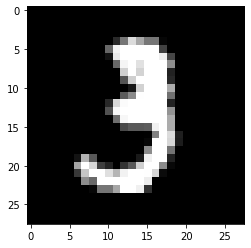

In [32]:
plt.imshow( X_train[10], cmap='gray' )

In [33]:
y_train[10]

3

In [34]:
X_tmp = X_train.reshape(60_000, 784)
X_tmp.shape

(60000, 784)

In [35]:
set_seed(0)

model = Sequential()

model.add( Flatten(input_shape=(28,28) ) )
model.add( Dense(256, activation="relu") )
model.add( Dropout(0.1) )
model.add( Dense(128, activation="relu") )
model.add( Dense(10, activation="softmax") )

model.compile(optimizer='rmsprop', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

result = model.fit(X_train, y_train, epochs=10, validation_split=0.05)


Epoch 1/10
1782/1782 [==============================] - 8s 4ms/step - loss: 0.2234 - accuracy: 0.9328 - val_loss: 0.0960 - val_accuracy: 0.9730
Epoch 2/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.1085 - accuracy: 0.9684 - val_loss: 0.0835 - val_accuracy: 0.9800
Epoch 3/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0842 - accuracy: 0.9758 - val_loss: 0.0796 - val_accuracy: 0.9800
Epoch 4/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0716 - accuracy: 0.9799 - val_loss: 0.1060 - val_accuracy: 0.9773
Epoch 5/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0613 - accuracy: 0.9839 - val_loss: 0.1174 - val_accuracy: 0.9790
Epoch 6/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0560 - accuracy: 0.9850 - val_loss: 0.1089 - val_accuracy: 0.9810
Epoch 7/10
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0516 - accuracy: 0.9863 - val_loss: 0.1092 - val_accuracy:

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [37]:
y_pred = model.predict(X_test)

In [47]:
y_test[111]

7

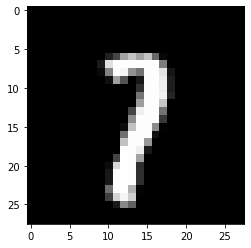

In [48]:
plt.imshow(X_test[111], cmap="gray")

In [49]:
model.predict( X_test[111].reshape(1,28,28) )

array([[1.21645935e-16, 6.74403623e-07, 3.65865183e-09, 1.09912544e-10,
        2.53297241e-14, 5.27082671e-18, 1.33542494e-21, 9.99999285e-01,
        2.53347898e-11, 4.30844443e-10]], dtype=float32)

In [50]:
np.argmax( model.predict( X_test[111].reshape(1,28,28) ) )

7

In [54]:
y_pred = np.argmax( model.predict(X_test) , axis=-1 )
pd.DataFrame( confusion_matrix(y_test, y_pred) )

,0,1,2,3,4,5,6,7,8,9
0,973,1,0,1,1,0,0,2,1,1
1,0,1130,1,1,0,0,1,1,1,0
2,4,1,1002,6,3,0,2,10,4,0
3,0,0,2,994,0,2,0,6,0,6
4,1,0,3,0,972,0,1,1,0,4
5,4,0,0,8,1,867,5,0,2,5
6,7,3,0,1,12,3,931,0,1,0
7,1,3,5,0,2,0,0,1009,3,5
8,3,2,2,4,2,2,2,4,944,9
9,1,2,0,1,9,2,0,3,1,990


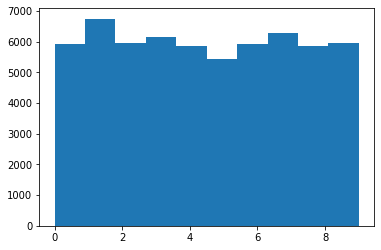

In [57]:
plt.hist( y_train )
plt.show()

In [58]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               200960    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [59]:
accuracy_score(y_test, y_pred)

0.9812

In [79]:
INDEX = 20
y_test[INDEX]

np.random.seed(0)
tmp = X_test[INDEX] + np.random.rand(28,28) #normal(0.5, 0.1, (28,28))

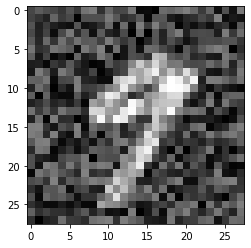

In [80]:
plt.imshow(tmp, cmap='gray')

In [81]:
np.argmax( model.predict( tmp.reshape(1,28,28) ) )

9

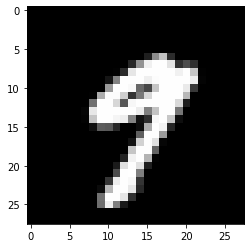

In [82]:
plt.imshow(X_test[INDEX], cmap='gray')


(28, 28)
8


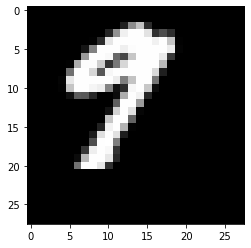

In [87]:
tmp = X_test[INDEX][4:-3, 3:-5]
tmp = np.hstack([ tmp, np.zeros([21,8])  ])
tmp = np.vstack([ tmp, np.zeros([7,28]) ])
plt.imshow(tmp, cmap='gray')
print(tmp.shape)

print( np.argmax( model.predict( tmp.reshape(1,28,28) ) ) )

### Zapis/odczyt sieci

In [88]:
from keras.models import model_from_json, load_model

In [89]:
# zapis sieci
model.save("model.h5")
model.save("ann-dump/")

INFO:tensorflow:Assets written to: ann-dump/assets


In [90]:
model2 = load_model("model.h5")
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               200960    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [91]:
model3 = load_model("ann-dump/")
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               200960    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [93]:
# serializacja architektury sieci do pliku JSON
model_json = model.to_json()
with open("model.json", "wt") as fd:
  fd.write(model_json)
# zapis wag sieci do pliku
model.save_weights("model-wagi.h5")

In [94]:
# deserializacja architektury sieci
with open("model.json", "rt") as fd:
  model_json = fd.read()
model4 = model_from_json(model_json)
# odczyt wag
model4.load_weights("model-wagi.h5")
model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               200960    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [95]:
model4.predict(X_test[0].reshape(1,28,28))

array([[2.6225020e-33, 9.5982702e-27, 4.4070886e-17, 6.8290099e-17,
        1.1506306e-34, 3.7349313e-31, 0.0000000e+00, 1.0000000e+00,
        7.7182425e-30, 4.6537281e-18]], dtype=float32)

In [97]:
# klonowanie sieci
config = model4.get_config()
model5 = Sequential.from_config(config)
model5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               200960    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
